In [1]:
import numpy as np
import torch
from torch import nn
import torch.optim as optim
import scipy
from scipy import special
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot
from torch.autograd import Variable


from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from scipy.stats import anderson

from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)
from __future__ import annotations
import math
import warnings
from collections import namedtuple


import numpy as np
from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)

from scipy.stats import norm



In [2]:
class GaussianDropout(nn.Module):
    def __init__(self, alpha=1.0):
        super(GaussianDropout, self).__init__()
        self.alpha = torch.Tensor([alpha])
        
    def forward(self, x):
        """
        Sample noise   e ~ N(1, alpha)
        Multiply noise h = h_ * e
        """
        if self.train():
            # N(1, alpha)
            epsilon = torch.randn(x.size()) * self.alpha + 1

            epsilon = Variable(epsilon)
            

            return x * epsilon
        else:
            return x

In [3]:
def Gaussiandropout(p=None, dim=None):
    return GaussianDropout(p/(1-p))

In [14]:
num_inputs = 4
num_h1 = 40
num_h2 = 20
num_outputs = 1

#Defining Network
net = nn.Sequential(
    nn.Linear(int(num_inputs), int(num_h1)), 
    nn.ReLU(),
    nn.Dropout(0,5),
    nn.Linear(int(num_h1), int(num_h2)), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(int(num_h2), int(num_outputs)),
    nn.Sigmoid())


    
#Xavier Initialisation
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight, gain=1.0)
        m.bias.data.zero_()

net.apply(init_weights);

In [5]:
num_inputs = 4
num_h1 = 40
num_h2 = 20
num_outputs = 1

#Defining Network
net_2 = nn.Sequential(
    nn.Linear(int(num_inputs), int(num_h1)), 
    nn.ReLU(),
    nn.Dropout(0,5),
    nn.Linear(int(num_h1), int(num_h2)), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(int(num_h2), int(num_outputs)),
    nn.Sigmoid())


    
#Xavier Initialisation
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight, gain=1.0)
        m.bias.data.zero_()

net_2.apply(init_weights);

In [6]:
#create function that generates training data and labels and splits them up
def gen_data(x):
    # So we need to generate a tensor with four columns with random variables in each column and a label column with os or 1s
    accept = []
    T = 1
    y_accept = torch.empty(1,1)
    y_reject = torch.empty(1,1)
    X_accept = torch.empty(1,4)
    X_reject = torch.empty(1,4)
    
    X = torch.rand(x,4)
    # applying the Sobol method
    for i in range(x):
        u = T*(-torch.log(X[i,0]) - torch.log(X[i,1]) - torch.log(X[i,2]))
    
        if X[i,3] > math.exp((u- math.sqrt(1+(u**2)))/T):
            y_reject = torch.cat((y_reject,torch.zeros(1,1)),0)
            X_reject = torch.cat((X_reject,X[[i]]),0)
            
        elif X[i,3] < math.exp((u- math.sqrt(1+(u**2)))/T):
            y_accept = torch.cat((y_accept,torch.ones(1,1)),0)
            X_accept = torch.cat((X_accept,X[[i]]),0)
            number = u.tolist()
            accept.append(number)
            
            


    # removing the top empty row from the tensors
    X_reject = X_reject[torch.arange(X_reject.size(0))!=0]
    X_accept = X_accept[torch.arange(X_accept.size(0))!=0]
    y_reject = y_reject[torch.arange(y_reject.size(0))!=0]
    y_accept = y_accept[torch.arange(y_accept.size(0))!=0]

    
    
    
    accept_data = torch.cat((X_accept,y_accept),1)
    reject_data = torch.cat((X_reject,y_reject),1)
    len_accept = len(accept_data)
    len_reject = len(reject_data)
    
    #reject_data = reject_data.detach().numpy()
    #print(accept_data)
    rows_removed = len_accept-len_reject
    print(rows_removed)
    accept_data = np.delete(accept_data,np.arange(rows_removed), 0)
    #print(len(reject_data))
    #accept_data = torch.from_numpy(accept_data)
    print(accept_data)
    #print(reject_data)
    #print(accept_data)


    total_data = torch.cat((accept_data,reject_data),0)
    #print(total_data)
    total_data = total_data[torch.randperm(total_data.size()[0])]
    #print(total_data)
    X = total_data[:, :4]
    #print(X)
    y = total_data[:, 4:5]
    #print(y)
    return X, y, accept

        
        
        
    


In [7]:
X,y,accept = gen_data(2000000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

1250198
tensor([[0.0033, 0.6253, 0.7145, 0.5042, 1.0000],
        [0.4210, 0.3670, 0.2235, 0.6546, 1.0000],
        [0.0386, 0.5073, 0.5087, 0.1340, 1.0000],
        ...,
        [0.9152, 0.2439, 0.5313, 0.0691, 1.0000],
        [0.9965, 0.4410, 0.4769, 0.6295, 1.0000],
        [0.8093, 0.6338, 0.8375, 0.5467, 1.0000]])


In [26]:
# hyperparamters
num_epochs, lr = 300, 0.1
optimizer = optim.SGD(net.parameters(), lr = lr)
BATCH_SIZE = 64

In [21]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        #self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], 
               #self.y_data[index]
    
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test),torch.FloatTensor(y_test))
#Val data
class ValData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

val_data = ValData(torch.FloatTensor(X_val),torch.FloatTensor(y_val))

In [22]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
# batch size is 1 for test loader
test_loader = DataLoader(dataset=test_data, batch_size=1)
val_loader= DataLoader(dataset = val_data, batch_size = BATCH_SIZE)

In [23]:
#loss function
criterion = nn.BCEWithLogitsLoss()

In [24]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [27]:
net.train()
loss = []
loss_values = []
training_acc = []



valid_loss_classifier = []
validation_acc = []
for e in range(1, num_epochs+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        y_pred = net(X_batch)
        


        
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    
    loss_values.append((epoch_loss/len(train_loader)))
    training_acc.append(epoch_acc/len(train_loader))
    
    
    
    #print(torch.cat((y_pred,y_batch),1))
    valid_loss = 0
    val_acc = 0 
    net.eval()
    for X_batch,y_batch in val_loader:
        val_pred = net(X_batch)
        
        val_loss = criterion(val_pred,y_batch)
        val_accuracy = binary_acc(val_pred,y_batch)
        
        val_acc += val_accuracy.item()
        valid_loss += val_loss.item()
    valid_loss_classifier.append(valid_loss/len(val_loader))
    validation_acc.append(val_acc/len(val_loader))
    
    

    
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.55266 | Acc: 52.198
Epoch 002: | Loss: 0.51703 | Acc: 56.691
Epoch 003: | Loss: 0.51246 | Acc: 60.597
Epoch 004: | Loss: 0.51026 | Acc: 66.096
Epoch 005: | Loss: 0.50916 | Acc: 71.322
Epoch 006: | Loss: 0.50851 | Acc: 75.284
Epoch 007: | Loss: 0.50807 | Acc: 78.121
Epoch 008: | Loss: 0.50772 | Acc: 80.206
Epoch 009: | Loss: 0.50749 | Acc: 81.888
Epoch 010: | Loss: 0.50731 | Acc: 83.280
Epoch 011: | Loss: 0.50716 | Acc: 84.429
Epoch 012: | Loss: 0.50702 | Acc: 85.332
Epoch 013: | Loss: 0.50693 | Acc: 86.213
Epoch 014: | Loss: 0.50679 | Acc: 86.806
Epoch 015: | Loss: 0.50671 | Acc: 87.428
Epoch 016: | Loss: 0.50667 | Acc: 87.982
Epoch 017: | Loss: 0.50656 | Acc: 88.407
Epoch 018: | Loss: 0.50650 | Acc: 88.839
Epoch 019: | Loss: 0.50647 | Acc: 89.203
Epoch 020: | Loss: 0.50643 | Acc: 89.546
Epoch 021: | Loss: 0.50634 | Acc: 89.813
Epoch 022: | Loss: 0.50629 | Acc: 90.105
Epoch 023: | Loss: 0.50622 | Acc: 90.394
Epoch 024: | Loss: 0.50615 | Acc: 90.574
Epoch 025: | Los

Epoch 201: | Loss: 0.50483 | Acc: 97.338
Epoch 202: | Loss: 0.50483 | Acc: 97.351
Epoch 203: | Loss: 0.50480 | Acc: 97.399
Epoch 204: | Loss: 0.50488 | Acc: 97.429
Epoch 205: | Loss: 0.50485 | Acc: 97.417
Epoch 206: | Loss: 0.50479 | Acc: 97.395
Epoch 207: | Loss: 0.50482 | Acc: 97.404
Epoch 208: | Loss: 0.50478 | Acc: 97.387
Epoch 209: | Loss: 0.50482 | Acc: 97.432
Epoch 210: | Loss: 0.50476 | Acc: 97.408
Epoch 211: | Loss: 0.50481 | Acc: 97.497
Epoch 212: | Loss: 0.50475 | Acc: 97.446
Epoch 213: | Loss: 0.50481 | Acc: 97.413
Epoch 214: | Loss: 0.50479 | Acc: 97.475
Epoch 215: | Loss: 0.50477 | Acc: 97.432
Epoch 216: | Loss: 0.50476 | Acc: 97.488
Epoch 217: | Loss: 0.50482 | Acc: 97.475
Epoch 218: | Loss: 0.50479 | Acc: 97.406
Epoch 219: | Loss: 0.50483 | Acc: 97.525
Epoch 220: | Loss: 0.50479 | Acc: 97.453
Epoch 221: | Loss: 0.50475 | Acc: 97.458
Epoch 222: | Loss: 0.50479 | Acc: 97.456
Epoch 223: | Loss: 0.50478 | Acc: 97.495
Epoch 224: | Loss: 0.50478 | Acc: 97.505
Epoch 225: | Los

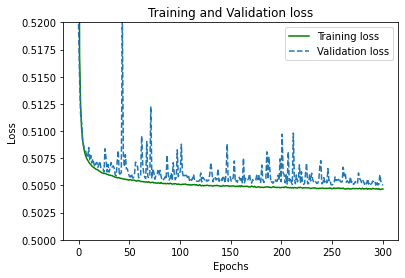

In [28]:
plt.plot(np.linspace(0,num_epochs,num_epochs), loss_values, 'g', label='Training loss')
plt.plot(np.linspace(0,num_epochs,num_epochs), valid_loss_classifier, '--', label='Validation loss')
plt.ylim(0.5,0.52)
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

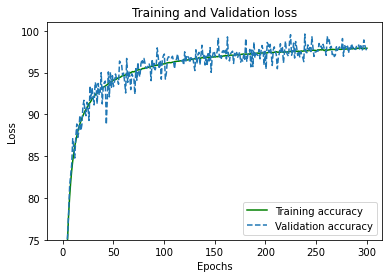

In [29]:
plt.plot(np.linspace(0,num_epochs,num_epochs), training_acc, 'g', label='Training accuracy')
plt.plot(np.linspace(0,num_epochs,num_epochs), validation_acc, '--', label='Validation accuracy')
plt.ylim(75,101)
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Testing the model 
T = 1
X_batches = []
X_pred_accept = []
y_pred_list = []
net.eval()
X_1_accepted = []
X_2_accepted = []
X_3_accepted = []
X_4_accepted = []
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch[0]
        y_test_pred = net(X_batch[0])
        
               
        y_test_pred = torch.sigmoid(y_test_pred)
        
        #for i in range(len(y_test_pred)):
            #if y_test_pred >= 0.55:
                #y_test_pred[i] = 1
            #else: 
                #y_test_pred[i] = 0
            




        y_pred_tag = torch.round(y_test_pred)
        if y_pred_tag == 1:
            X_batches.append(X_batch)
            X_1_accepted.append(X_batch[0,0].item())
            X_2_accepted.append(X_batch[0,1].item())
            X_3_accepted.append(X_batch[0,2].item())
            X_4_accepted.append(X_batch[0,2].item())
            u = T*(-torch.log(X_batch[0,0]) - torch.log(X_batch[0,1]) - torch.log(X_batch[0,2]))
            X_pred_accept.append(u.item())
        #print(y_pred_tag)
        y_pred_list.append(y_pred_tag.numpy())
     #   print(y_pred_list)

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]




In [ ]:
plt.hist(X_pred_accept, np.linspace(0,11,100))
plt.show()


In [31]:
accepted_u = torch.FloatTensor([X_pred_accept])

accepted_u = torch.transpose(accepted_u,0,1)
print(accepted_u)

tensor([[3.2743],
        [2.9755],
        [2.8017],
        ...,
        [6.7601],
        [5.2898],
        [1.1104]])


In [ ]:
confusion_matrix(y_test, y_pred_list)

In [ ]:
def Gaussiandropout(p=None, dim=None):
    return GaussianDropout(p/(1-p))

In [32]:
# #REGRESSION MODEL


num_inputs = 3
num_h1 = 40
num_h2 = 30
num_h3 = 20
num_outputs = 1

#Defining Network
net_reg = nn.Sequential(
    nn.Linear(int(num_inputs), int(num_h1)), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(int(num_h1), int(num_h2)), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(int(num_h2), int(num_h3)), 
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(int(num_h3), int(num_outputs)),
    nn.ReLU())
  
    


    


In [33]:
# we need to have velocity given by Sobol Rejection method as the Label for each of set of data points
X_1 = torch.FloatTensor([X_1_accepted])
X_1 = torch.transpose(X_1,0,1)

X_2 = torch.FloatTensor([X_2_accepted])
X_2 = torch.transpose(X_2,0,1)

X_3 = torch.FloatTensor([X_3_accepted])
X_3 = torch.transpose(X_3,0,1)

#X_4 = torch.FloatTensor([X_4_accepted])
#X_4 = torch.transpose(X_4,0,1)

X_reg = torch.cat((X_1,X_2,X_3),1)
y_reg = T*(-torch.log(X_1) - torch.log(X_2) -torch.log(X_3))


In [34]:
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(X_reg, y_reg, test_size=0.33, random_state=1)
Xreg_train, Xreg_val, yreg_train, yreg_val = train_test_split(Xreg_train, yreg_train, test_size=0.25, random_state=1)
 

In [35]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data_reg = TrainData(torch.FloatTensor(Xreg_train), 
                       torch.FloatTensor(yreg_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data_reg = TestData(torch.FloatTensor(Xreg_test),torch.FloatTensor(yreg_test))

#Val data
class ValData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

val_data_reg = ValData(torch.FloatTensor(Xreg_val),torch.FloatTensor(yreg_val))

In [36]:
# hyperparamters
num_epochs, lr = 500, 0.01
optimizer = optim.Adam(net_reg.parameters(), lr = lr)
BATCH_SIZE_train = len(Xreg_train)
BATCH_SIZE_test = len(Xreg_test)
BATCH_SIZE_val = len(Xreg_val)

In [37]:
train_loader = DataLoader(dataset=train_data_reg, batch_size=BATCH_SIZE_train, shuffle=True)

test_loader = DataLoader(dataset=test_data_reg, batch_size=BATCH_SIZE_test)

val_loader = DataLoader(dataset=val_data_reg, batch_size=BATCH_SIZE_val)

In [38]:
#loss function
loss_function = nn.MSELoss( )

In [39]:
net_reg.train()
training_loss = []
validation_losses = []
for e in range(1, num_epochs+1):
    
    epoch_loss = 0
    
    for X_batch, y_batch in train_loader:
    
        optimizer.zero_grad()
        
        y_pred = net_reg(X_batch)
        loss = loss_function(y_pred, y_batch)
        


        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
    
    
        training_loss.append(epoch_loss/len(train_loader))
        
        
        
    valid_loss = 0.0
    net_reg.eval()     
    for X_batch,y_batch in val_loader:
        
        val_pred = net_reg(X_batch)
        val_loss = loss_function(val_pred,y_batch)
        valid_loss += val_loss.item()
        validation_losses.append(valid_loss/len(val_loader))
        
        


    
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss:.5f}')

Epoch 001: | Loss: 12.20741
Epoch 002: | Loss: 11.33848
Epoch 003: | Loss: 10.32948
Epoch 004: | Loss: 9.07425
Epoch 005: | Loss: 7.54435
Epoch 006: | Loss: 5.92467
Epoch 007: | Loss: 4.69362
Epoch 008: | Loss: 4.62637
Epoch 009: | Loss: 5.54893
Epoch 010: | Loss: 5.68735
Epoch 011: | Loss: 5.02512
Epoch 012: | Loss: 4.28308
Epoch 013: | Loss: 3.84754
Epoch 014: | Loss: 3.72450
Epoch 015: | Loss: 3.75586
Epoch 016: | Loss: 3.79448
Epoch 017: | Loss: 3.75912
Epoch 018: | Loss: 3.62702
Epoch 019: | Loss: 3.41558
Epoch 020: | Loss: 3.17025
Epoch 021: | Loss: 2.95444
Epoch 022: | Loss: 2.82645
Epoch 023: | Loss: 2.79221
Epoch 024: | Loss: 2.78254
Epoch 025: | Loss: 2.70803
Epoch 026: | Loss: 2.53957
Epoch 027: | Loss: 2.32495
Epoch 028: | Loss: 2.13390
Epoch 029: | Loss: 2.00024
Epoch 030: | Loss: 1.90960
Epoch 031: | Loss: 1.82193
Epoch 032: | Loss: 1.70317
Epoch 033: | Loss: 1.54392
Epoch 034: | Loss: 1.36264
Epoch 035: | Loss: 1.19570
Epoch 036: | Loss: 1.07445
Epoch 037: | Loss: 0.9957

Epoch 305: | Loss: 0.07708
Epoch 306: | Loss: 0.07673
Epoch 307: | Loss: 0.07639
Epoch 308: | Loss: 0.07605
Epoch 309: | Loss: 0.07571
Epoch 310: | Loss: 0.07536
Epoch 311: | Loss: 0.07503
Epoch 312: | Loss: 0.07469
Epoch 313: | Loss: 0.07435
Epoch 314: | Loss: 0.07402
Epoch 315: | Loss: 0.07369
Epoch 316: | Loss: 0.07336
Epoch 317: | Loss: 0.07303
Epoch 318: | Loss: 0.07270
Epoch 319: | Loss: 0.07237
Epoch 320: | Loss: 0.07204
Epoch 321: | Loss: 0.07171
Epoch 322: | Loss: 0.07139
Epoch 323: | Loss: 0.07106
Epoch 324: | Loss: 0.07074
Epoch 325: | Loss: 0.07042
Epoch 326: | Loss: 0.07010
Epoch 327: | Loss: 0.06978
Epoch 328: | Loss: 0.06946
Epoch 329: | Loss: 0.06915
Epoch 330: | Loss: 0.06883
Epoch 331: | Loss: 0.06852
Epoch 332: | Loss: 0.06821
Epoch 333: | Loss: 0.06790
Epoch 334: | Loss: 0.06759
Epoch 335: | Loss: 0.06728
Epoch 336: | Loss: 0.06698
Epoch 337: | Loss: 0.06667
Epoch 338: | Loss: 0.06638
Epoch 339: | Loss: 0.06608
Epoch 340: | Loss: 0.06579
Epoch 341: | Loss: 0.06550
E

In [47]:
# Testing the model 


with torch.no_grad():
    for X_batch, y_batch in test_loader:
        yreg_test_pred = net_reg(X_batch)
        


        testing_loss = torch.mean((yreg_test_pred-y_batch)**2)      


In [48]:
#no dropout
print(testing_loss)
print(training_loss[-1])
print(validation_losses[-1])

tensor(0.0404)
0.042331185191869736
0.03721140697598457


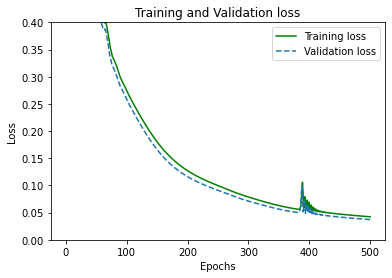

In [44]:
# Gaussian dropout
plt.plot(np.linspace(0,num_epochs,num_epochs), training_loss, 'g', label='Training loss')
plt.plot(np.linspace(0,num_epochs,num_epochs), validation_losses, '--', label='Validation loss')
plt.ylim(0,0.4)

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

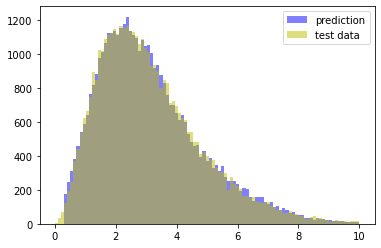

In [54]:
pyplot.hist(yreg_test_pred.squeeze().tolist(), np.linspace(0,10,100),alpha = 0.5, color = 'b', label = 'prediction')
pyplot.hist(yreg_test.squeeze().tolist(), np.linspace(0,10,100),alpha = 0.5, color = 'y',label = 'test data')
pyplot.legend(loc='upper right')
pyplot.show()


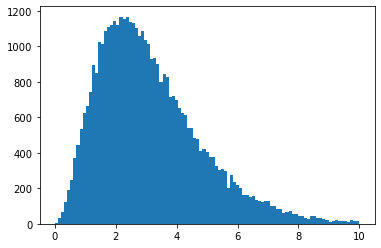

In [51]:

plt.hist(yreg_test.squeeze().tolist(), np.linspace(0,10,100))
plt.show()

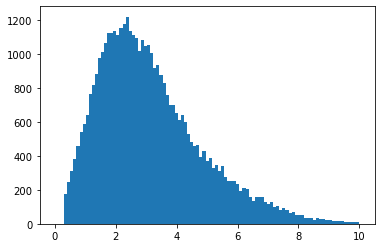

In [52]:
plt.hist(yreg_test_pred.squeeze().tolist(), np.linspace(0,10,100))
plt.show()

In [49]:
r2_score(y_batch,yreg_test_pred)

0.9865704909827813

In [ ]:
def anderson_darling(x, dist = 'norm'):
    y, ranking = torch.sort(x)
    xbar = torch.mean(x)
    N = y.size(dim = 1)
    N = float(N)
    if dist == 'norm':
        s = torch.std(x, axis = 1)
        w = (y - xbar) / s
        logcdf = torch.tensor(scipy.stats.norm.logcdf(w)).float()
        logsf = torch.tensor(scipy.stats.norm.logsf(w)).float()
        sig = array([15, 10, 5, 2.5, 1])
        _Avals_norm = array([0.576, 0.656, 0.787, 0.918, 1.092])
        critical = around(_Avals_norm / (1.0 + 4.0/N - 25.0/N/N), 3)
        i = arange(1, N + 1)
        #i = float(i)
        u = (2.0*i - 1.0) / N
        u = torch.from_numpy(u).float()
        v = logcdf + torch.flip(logsf,[0,1])
        v = torch.transpose(v,0,1)
        use = torch.matmul(u,v)
        torch.sum(use,axis = 0)
        A2 = -N - torch.sum(use,axis = 0)

        
        
    return A2

In [57]:
from scipy.stats import wasserstein_distance
wasserstein_distance(torch.Tensor(y_batch).reshape(1,-1).flatten(),torch.Tensor(yreg_test_pred).reshape(1,-1).flatten())


0.020958550071788262

In [65]:
def get_real_MJ(x):
   
    accept = []
    T = 1

    X_accept = []
    y_reject = []

    X = np.random.rand(10*x,4)
    #print(X)
    
    
    for i in range(len(X)):
        
    
            
                
            
            u = T*(-np.log(X[i,0]) - np.log(X[i,1]) - np.log(X[i,2]))
            if X[i,3] < math.exp((u - math.sqrt(1+(u**2)))/T) and len(accept)<x:


                number = u.tolist()
                
                accept.append(number)
                #print(len(accept))
                
    accept = torch.Tensor(accept)
    accept = accept.reshape(1,-1)
    accept = accept
        
                
    return accept.requires_grad_()


In [136]:
a = get_real_MJ(42699).detach()
b = get_real_MJ(42699).detach()

In [76]:
stats.ks_2samp(torch.Tensor(a).reshape(1,-1).flatten(),torch.Tensor(b).reshape(1,-1).flatten(),mode = 'asymp')

KstestResult(statistic=0.00555048127590807, pvalue=0.5245002484013765)

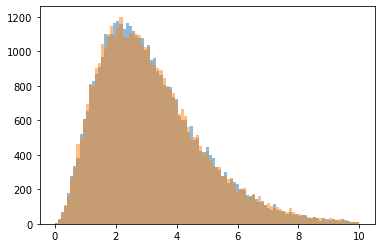

In [74]:
plt.hist(a,np.linspace(0,10,100),alpha = 0.5)
plt.hist(b,np.linspace(0,10,100),alpha = 0.5)
plt.show()

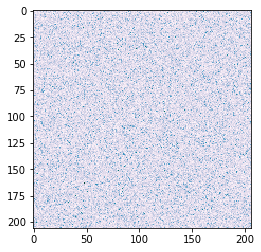

In [144]:
import pylab as plt
import numpy as np

Z =   yreg_test_pred.reshape(1,-1)[:,:-263].reshape(206,206)
plt.imshow(Z, cmap='PuBuGn', interpolation='nearest')
plt.show()